In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#inserting data set
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/kgce lms/expt7/expt7.csv')
#printing dataset
df


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63,F
466,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,F
467,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52,F
468,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79,F


# Check if all attributes are properly formed find missing values, outliers etc....

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

DGN        0
PRE4       0
PRE5       0
PRE6       0
PRE7       0
PRE8       0
PRE9       0
PRE10      0
PRE11      0
PRE14      0
PRE17      0
PRE19      0
PRE25      0
PRE30      0
PRE32      0
AGE        0
Risk1Yr    0
dtype: int64


# Describing the data

In [ ]:
#Check Descriptive Statistics
df.describe()

,PRE4,PRE5,AGE
count,470.000000,470.000000,470.000000
mean,3.281638,4.568702,62.534043
std,0.871395,11.767857,8.706902
min,1.440000,0.960000,21.000000
25%,2.600000,1.960000,57.000000
50%,3.160000,2.400000,62.000000
75%,3.807500,3.080000,69.000000
max,6.300000,86.300000,87.000000


# 1.How many patients suffer pain before surgery?

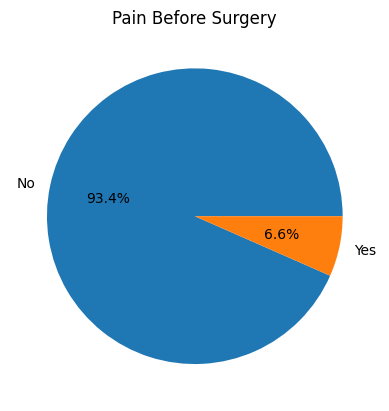

In [ ]:
# count the occurrences of each value
counts = df['PRE7'].value_counts()
# filter the data for the two values
subset_counts = counts.loc[['F', 'T']]
labels = ['No' , 'Yes']
plt.pie(subset_counts, labels=labels, autopct='%1.1f%%')
plt.title('Pain Before Surgery')
plt.show()


# 2.How many patients suffer cough before surgery?

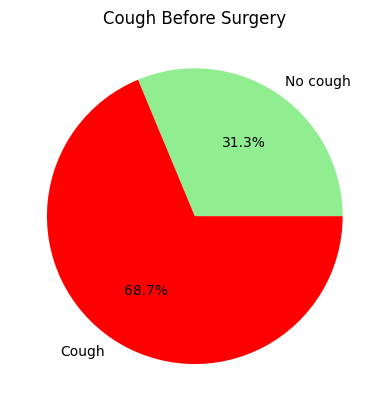

In [ ]:
# count the occurrences of each value
counts = df['PRE10'].value_counts()
# filter the data for the two values
subset_counts = counts.loc[['F', 'T']]
labels = ['No cough' , 'Cough']
colors = ['lightgreen' , 'Red']
plt.pie(subset_counts, colors=colors, labels=labels, autopct='%1.1f%%')
plt.title('Cough Before Surgery')
plt.show()


# 3 How many patients suffer from different DGN's?

In [ ]:
df2 = df.copy()
df2

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,DGN2,3.88,2.12,PRZ1,F,F,F,T,F,OC13,F,F,F,T,F,63,F
466,DGN3,3.76,3.12,PRZ0,F,F,F,F,F,OC11,F,F,F,T,F,61,F
467,DGN3,3.04,2.08,PRZ1,F,F,F,T,F,OC13,F,F,F,F,F,52,F
468,DGN3,1.96,1.68,PRZ1,F,F,F,T,T,OC12,F,F,F,T,F,79,F


In [ ]:
df2[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25', 
     'PRE30', 'PRE32', 'Risk1Yr']] = df2[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 
                                          'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 
                                          'Risk1Yr']].apply(lambda x: np.where(x == 'T', 1, 0)) 

<Axes: title={'center': 'Weakness Before Surgery'}, xlabel='PRE11', ylabel='count'>

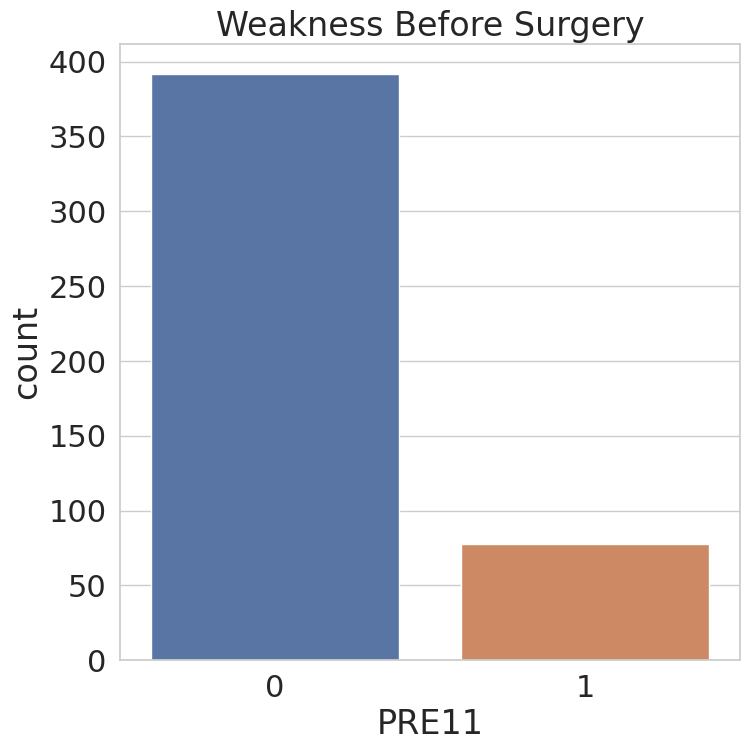

In [ ]:
# this plot shows count of a given DGN in all patients
sns.set_style(style="whitegrid")
fig, ax = plt.subplots(figsize=(8 , 8))
ax.set_title("Weakness Before Surgery")
sns.set(font_scale=2)
sns.countplot(x='PRE11', data=df2)

# 4.Count types of OC from OC11(smallest) to OC14(larger) in patients?

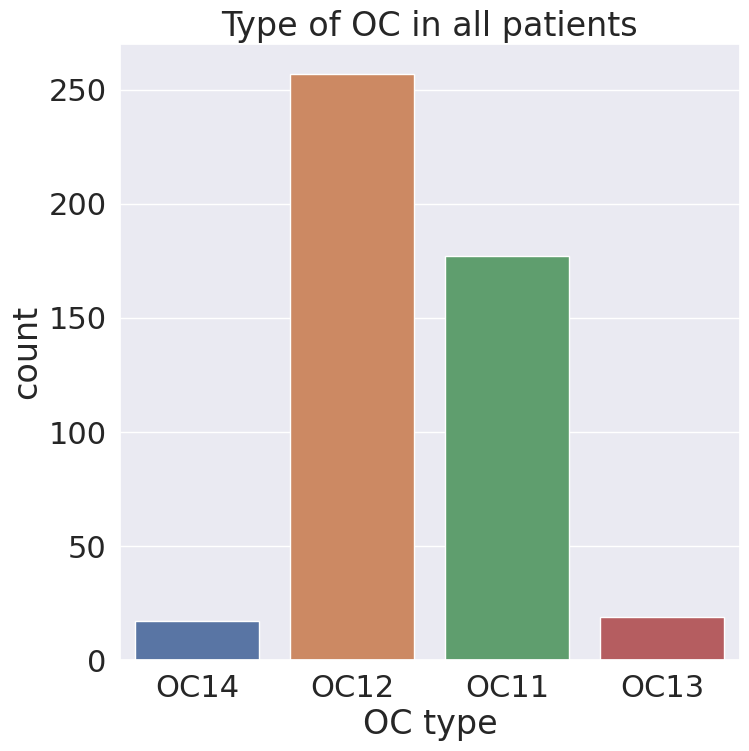

In [ ]:
# this plot shows count of a given OC in all patients
sns.set_style(style="darkgrid")
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title("Type of OC in all patients")
sns.set(font_scale=2)
sns.countplot(x= 'PRE14', data = df2)
ax.set_xlabel('OC type')
plt.show()

# Find what kind of ML Problem you can define over this data and define it. Propose 2 distinct ML Algorithm based solutions      
Ans:-Here is the list of commonly used machine learning algorithms. These algorithms can be applied to almost any data problem:

Linear Regression,
Logistic Regression,
Decision Tree,
SVM,
Naive Bayes,
kNN,
K-Means,
Random Forest,
Dimensionality Reduction Algorithms,
Gradient Boosting algorithms,

# In expt 8 we are going to use SVM algorithm :-
SVM (Support Vector Machine) is a supervised machine learning algorithm used for classification and regression analysis. It works by finding the optimal hyperplane that separates the data into different classes, where a hyperplane is a decision boundary that separates two classes in a high-dimensional space.

# In expt 9 we are going to use Random Forest algorithm :-
Random Forest is a machine learning algorithm that is commonly used for classification, regression, and feature selection tasks. It is an ensemble learning method that combines multiple decision trees to improve the accuracy and generalization of the model.
In a random forest, a large number of decision trees are trained on different subsets of the training data and with different subsets of features. The decision trees are trained using a technique called bagging (bootstrap aggregating), where each tree is trained on a random sample of the training data with replacement. This technique helps to reduce overfitting and improve the accuracy of the model.